# Overview

This script animates the process of creating k-means clustering with a set of random samples and centroids.

In [2]:
import numpy as np
import pylab as plt
import time
from IPython.display import display, clear_output
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/Users/Ian/anaconda/envs/python36/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


---
## Generate Two 2 Dimensional Random Samples

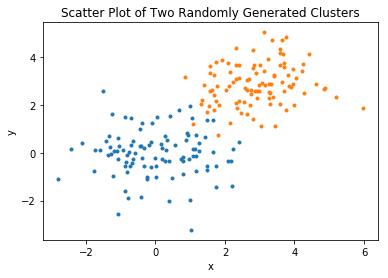

In [9]:
np.random.seed(123)
sample1 = np.random.randn(2, 100)
sample2 = np.random.randn(2, 100) + 3
plt.plot(sample1[0], sample1[1], ".");
plt.plot(sample2[0], sample2[1], ".");
plt.title("Scatter Plot of Two Randomly Generated Clusters");
plt.xlabel("x");
plt.ylabel("y");

### Figure 1

This is a scatter plot of two randomly generated clusters highlighted in blue and orange. Each cluster was generated with a Normal distribution. 

## Generate Two Centroids

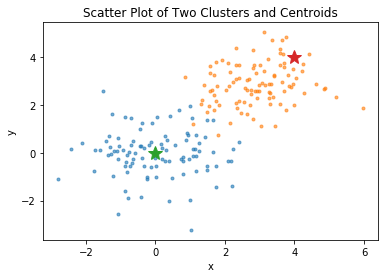

In [10]:
k = 2
sample = np.hstack([sample1, sample2])
centers = np.array([[0., 0.],[4., 4.]])

plt.plot(sample1[0], sample1[1], ".", alpha = 0.6);
plt.plot(sample2[0], sample2[1], ".", alpha = 0.6);
plt.plot(centers[0][0], centers[0][1], "*", ms = 15);
plt.plot(centers[1][0], centers[1][1], "*", ms = 15);
plt.title("Scatter Plot of Two Clusters and Centroids");
plt.xlabel("x");
plt.ylabel("y");

### Caption

This is a scatter plot of two randomly generated clusters with two centroids. The centroids were created by visual approximation of the centers of the clusters.

## Iterative K-Means Search



In [20]:
def dist(x, y, center):
    dist = np.sqrt((x-center[0])**2 + (y-center[1])**2)
    return dist

In [21]:
cl1 = dist(sample1[0], sample1[1], centers[0]) < dist(sample1[0], sample1[1], centers[1])
cl2 = dist(sample2[0], sample2[1], centers[0]) < dist(sample2[0], sample2[1], centers[1])

In [16]:
newc = np.array(
    [np.hstack([sample1[:, cl1], sample2[:, cl2]]).mean(axis=1), 
     np.hstack([sample1[:, ~cl1], sample2[:, ~cl2]]).mean(axis=1)])
centers, newc

(array([[ 0.,  0.],
        [ 4.,  4.]]), array([[ 0.16926183,  0.13798868],
        [ 3.0508775 ,  2.99453866]]))

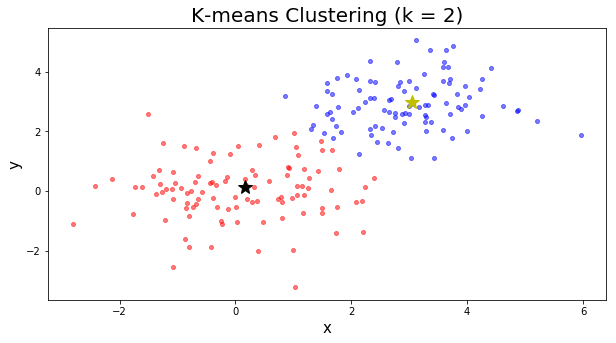

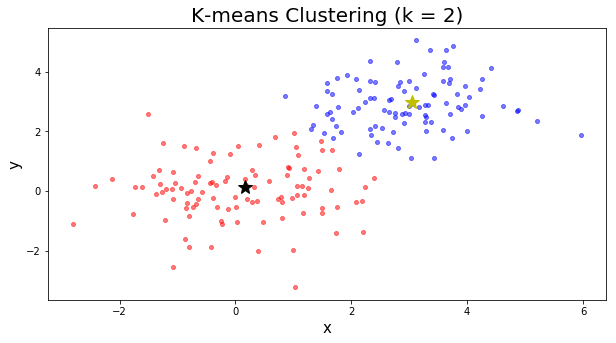

array([ 0.16926183,  0.13798868])

In [24]:
it = 0

fig, ax = plt.subplots(figsize=(10,5))

f1 = ax.plot(np.hstack([sample1[:, cl1], sample2[:, cl2]])[0], 
                      np.hstack([sample1[:, cl1], sample2[:, cl2]])[1], 'r.', ms=8, alpha=0.5)
f2 = ax.plot(np.hstack([sample1[:, ~cl1], sample2[:, ~cl2]])[0], 
                      np.hstack([sample1[:, ~cl1], sample2[:, ~cl2]])[1], 'b.', ms=8, alpha=0.5)
f3 = ax.plot(centers[0,0], centers[0,1], 'k*', ms=15)
f4 = ax.plot(centers[1,0], centers[1,1], 'y*', ms=15)

ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('K-means Clustering (k = 2)', fontsize=20)

display(fig)

while (not (centers == newc).all()) or it > 10:
    centers = newc
    
    f1.set_data(np.hstack([sample1[:, cl1], sample2[:, cl2]])[0], 
                  np.hstack([sample1[:, cl1], sample2[:, cl2]])[1])
    f2.set_data(np.hstack([sample1[:, ~cl1], sample2[:, ~cl2]])[0], 
                      np.hstack([sample1[:, ~cl1], sample2[:, ~cl2]])[1])
    f3.set_data(centers[0,0], centers[0,1])
    f4.set_data(centers[1,0], centers[1,1])
    
    time.sleep(1)
    clear_output(wait=True)
    display(fig)
    
    cl1 = dist(sample1[0], sample1[1], centers[0]) < dist(sample1[0], sample1[1], centers[1])
    cl2 = dist(sample2[0], sample2[1], centers[0]) < dist(sample2[0], sample2[1], centers[1])
    newc = np.array([np.hstack([sample1[:, cl1], sample2[:, cl2]]).mean(axis=1), 
                     np.hstack([sample1[:, ~cl1], sample2[:, ~cl2]]).mean(axis=1)])
    print(it)
    print (centers, newc)
    it += 1

plt.show()
newc[0]

### Caption

These are plots that shows the iteration of different centers in the k-mean clustering process. 